In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm

# sns.set()

%matplotlib inline

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
number_of_days = 365 * 3

In [3]:
df = pd.read_csv('fuel-prices/all_years_combined.csv', index_col='date', dtype={'price': np.int32}, 
                 parse_dates=True)
df.set_index(pd.date_range(min(df.index), periods=df.size, freq='D'), inplace=True, verify_integrity=True)
dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right', left_index=True, right_index=True, validate='one_to_one')
del df['delme']

In [4]:
# df

In [5]:
# df.plot(figsize=(16,8))

In [6]:
df_brent = pd.read_csv('oil-prices/brent-2017-2019.csv', index_col='date', parse_dates=True, 
                       dtype={'brent_oil_price': np.int32})
df = df.merge(df_brent, how='left', left_index=True, right_index=True, validate='one_to_one')

In [7]:
df_tapis = pd.read_csv('oil-prices/tapis-2017-2019.csv', index_col='date', parse_dates=True, 
                       dtype={'tapis_oil_price': np.int32})
df = df.merge(df_tapis, how='left', left_index=True, right_index=True, validate='one_to_one')

In [8]:
df_wti = pd.read_csv('oil-prices/wti-2017-2019.csv', index_col='date', parse_dates=True,
                       dtype={'wti_oil_price': np.int32})                     
df = df.merge(df_wti, how='left', left_index=True, right_index=True, validate='one_to_one')

In [9]:
df_nat_avg = pd.read_csv('fuel-prices/aip-national_avg-2017-2019.csv', index_col='date', parse_dates=True,
                         dtype={'national_avg_price': np.int32})                     
df = df.merge(df_nat_avg, how='left', left_index=True, right_index=True, validate='one_to_one')

In [10]:
df_exchange_rate = pd.read_csv('other-features/aud-sgd-exchange_rate_2017-2019.csv', index_col='date', 
                               parse_dates=True,)                     
df = df.merge(df_exchange_rate, how='left', left_index=True, right_index=True, validate='one_to_one')

In [11]:
df_exchange_rate = pd.read_csv('other-features/aud-usd-exchange_rate_2017-2019.csv', index_col='date', 
                               parse_dates=True,)                     
df = df.merge(df_exchange_rate, how='left', left_index=True, right_index=True, validate='one_to_one')

In [12]:
df_exchange_rate = pd.read_csv('other-features/fuel_volume_ml_2017-2019.csv', index_col='date', 
                               parse_dates=True,)                     
df = df.merge(df_exchange_rate, how='left', left_index=True, right_index=True, validate='one_to_one')

In [13]:
df_wholesale_prices = pd.read_csv('fuel-prices/wholesale_price-2017-2019.csv', index_col='date', 
                                  parse_dates=True, dtype={'wholesale_price': np.int32})                     
df = df.merge(df_wholesale_prices, how='left', left_index=True, right_index=True, validate='one_to_one')

In [14]:
df_wholesale_cluster = pd.read_csv('other-features/wholesale_cluster_2017-2019.csv', index_col='date', 
                                   parse_dates=True)   
df_wholesale_cluster = df_wholesale_cluster[['wholesale_cluster_label']]
df = df.merge(df_wholesale_cluster, how='left', left_index=True, right_index=True, validate='one_to_one')

In [15]:
df_tapis_oil_cluster = pd.read_csv('other-features/tapis_oil_cluster_2017-2019.csv', index_col='date', 
                                   parse_dates=True)   
df_tapis_oil_cluster = df_tapis_oil_cluster[['tapis_oil_cluster_label']]
df = df.merge(df_tapis_oil_cluster, how='left', left_index=True, right_index=True, validate='one_to_one')

In [16]:
df

price  brent_oil_price  tapis_oil_price  wti_oil_price  \
2017-01-01   1417             5504             5863           5236   
2017-01-02   1436             5504             5863           5236   
2017-01-03   1409             5504             5863           5236   
2017-01-04   1542             5457             5761           5326   
2017-01-05   1582             5499             5779           5377   
...           ...              ...              ...            ...   
2019-12-27   1608             6891             7445           6176   
2019-12-28   1589             6830             7456           6166   
2019-12-29   1579             6830             7456           6166   
2019-12-30   1602             6830             7456           6166   
2019-12-31   1609             6777             7411           6113   

            national_avg_price  sgd_exchange_rate  usd_exchange_rate  \
2017-01-01                1184             1.0425             0.7186   
2017-01-02                1184             1.0425             0.7186   
2017-01-03                1184             1.0479             0.7226   
2017-01-04                1186             1.0489             0.7284   
2017-01-05                1191             1.0479             0.7337   
...                        ...                ...                ...   
2019-12-27                1336             0.9435             0.6978   
2019-12-28                1349             0.9434             0.6995   
2019-12-29                1349             0.9434             0.6995   
2019-12-30                1349             0.9434             0.6995   
2019-12-31                1357             0.9444             0.7022   

            volume_in_ml  wholesale_price  wholesale_cluster_label  \
2017-01-01          18.7             1183                        1   
2017-01-02          18.7             1183                        1   
2017-01-03          18.7             1183                        0   
2017-01-04          18.7             1186                        0   
2017-01-05          18.7             1191                        0   
...                  ...              ...                      ...   
2019-12-27          14.3             1338                        0   
2019-12-28          14.3             1351                        0   
2019-12-29          14.3             1351                        0   
2019-12-30          14.3             1351                        0   
2019-12-31          14.3             1360                        0   

            tapis_oil_cluster_label  
2017-01-01                        1  
2017-01-02                        1  
2017-01-03                        1  
2017-01-04                        1  
2017-01-05                        1  
...                             ...  
2019-12-27                        0  
2019-12-28                        0  
2019-12-29                        0  
2019-12-30                        0  
2019-12-31                        0  

[1095 rows x 11 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2017-01-01 to 2019-12-31
Freq: D
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1095 non-null   int32  
 1   brent_oil_price          1095 non-null   int32  
 2   tapis_oil_price          1095 non-null   int32  
 3   wti_oil_price            1095 non-null   int32  
 4   national_avg_price       1095 non-null   int32  
 5   sgd_exchange_rate        1095 non-null   float64
 6   usd_exchange_rate        1095 non-null   float64
 7   volume_in_ml             1095 non-null   float64
 8   wholesale_price          1095 non-null   int32  
 9   wholesale_cluster_label  1095 non-null   int64  
 10  tapis_oil_cluster_label  1095 non-null   int64  
dtypes: float64(3), int32(6), int64(2)
memory usage: 117.0 KB


In [18]:
df.describe()

price  brent_oil_price  tapis_oil_price  wti_oil_price  \
count  1095.000000      1095.000000      1095.000000    1095.000000   
mean   1566.747032      6321.836530      6590.157078    5759.049315   
std     123.340779       899.934678       920.714585     766.463783   
min    1270.000000      4397.000000      4529.000000    4247.000000   
25%    1475.000000      5564.500000      5839.000000    5194.000000   
50%    1573.000000      6346.000000      6644.000000    5660.000000   
75%    1651.500000      6979.500000      7242.000000    6339.000000   
max    1872.000000      8607.000000      9028.000000    7740.000000   

       national_avg_price  sgd_exchange_rate  usd_exchange_rate  volume_in_ml  \
count         1095.000000        1095.000000        1095.000000   1095.000000   
mean          1254.180822           1.004962           0.736606     17.720457   
std             93.150221           0.048665           0.036842      4.687301   
min           1072.000000           0.924400           0.670400      7.200000   
25%           1169.500000           0.960100           0.706200     14.300000   
50%           1244.000000           1.006700           0.738700     17.600000   
75%           1334.000000           1.047650           0.766100     19.800000   
max           1475.000000           1.094100           0.811200     31.100000   

       wholesale_price  wholesale_cluster_label  tapis_oil_cluster_label  
count      1095.000000              1095.000000              1095.000000  
mean       1253.809132                 0.801826                 0.791781  
std          92.950839                 0.814627                 0.813801  
min        1072.000000                 0.000000                 0.000000  
25%        1170.000000                 0.000000                 0.000000  
50%        1245.000000                 1.000000                 1.000000  
75%        1334.000000                 2.000000                 1.000000  
max        1473.000000                 2.000000                 2.000000

### Time Series Histogram

In [19]:
features = ['price','wholesale_price']
# features = ['wholesale_price','sgd_exchange_rate']

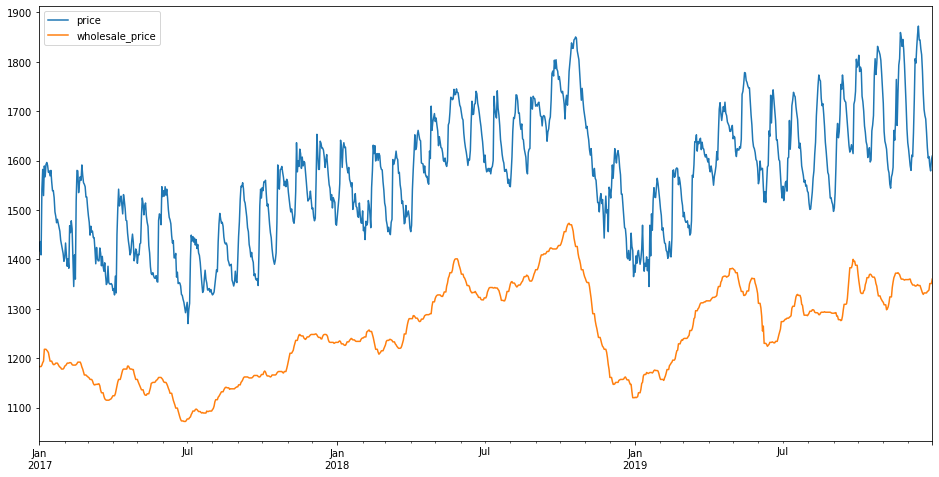

In [20]:
#df.info()
df[features].plot(figsize=(16,8))
# df.hist()
# ax = sns.distplot(df.price)
# ax.set(xlabel='Price in cents x 10')
# plt.show()

In [21]:
# df[['sgd_exchange_rate','usd_exchange_rate']].plot(figsize=(16,8))

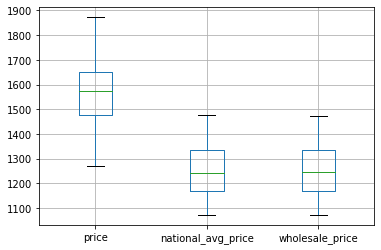

In [22]:
df[['price','national_avg_price','wholesale_price']].boxplot()

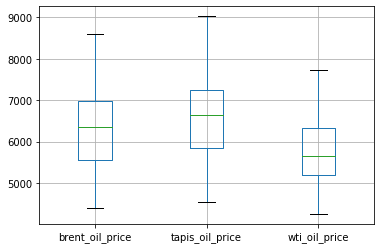

In [23]:
df[['brent_oil_price','tapis_oil_price','wti_oil_price']].boxplot()

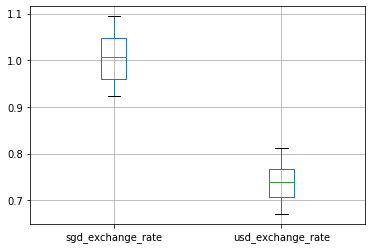

In [24]:
df[['sgd_exchange_rate','usd_exchange_rate']].boxplot()

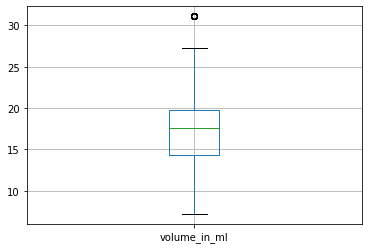

In [25]:
df[['volume_in_ml']].boxplot()

In [26]:
# df[df.index >= '2019-06-01']

In [27]:
# df_new = df[(df.index >= '2019-01-01') & (df.index < '2020-01-01')][features].copy()
# df_new = df[features].copy()

# for i in range(14):
#     df_new['t_minus_{:02d}_wholesale_price'.format(i + 1)] = df_new.wholesale_price.shift(i + 1)
    
# df_new['t_minus_5_wholesale_price'] = 300 + df_new.wholesale_price.shift(5)
# df_new['t_minus_0_wholesale_price'] = 1300 * df_new.sgd_exchange_rate
# df_new['price_adj'] = 5519 + df_new.price
# df_new['t_plus_1_price'] = df_new.price.shift(-1)
# del df_new['sgd_exchange_rate']
# df_new.dropna(inplace=True)
# df_new.t_minus_0_wholesale_price = df_new.t_minus_0_wholesale_price.astype('int32')
# df_new
# 1295

In [28]:
# df_new['tgp_perc_of_retail_adj'] = 1_300 + df_new.t_minus_5_wholesale_price / df_new.price * 100
# df_new.tapis_oil_price.mean()
# 6814-1295
# df_new

In [29]:
# df_new.plot(figsize=(16,8))

In [30]:
# import pandas_profiling
# df_new.profile_report(style={'full_width':True})

In [31]:
# _ = sns.pairplot(df_new)

In [32]:
# plot selected corr's
# plot_for_columns = ['brent_oil_price','tapis_oil_price','wti_oil_price','national_avg_price','usd_exchange_rate']
# plot_for_columns = ['wholesale_price','t_minus_01_wholesale_price','t_minus_02_wholesale_price','t_minus_03_wholesale_price','t_minus_04_wholesale_price','t_minus_05_wholesale_price','t_minus_06_wholesale_price','t_minus_07_wholesale_price','t_minus_08_wholesale_price','t_minus_09_wholesale_price','t_minus_10_wholesale_price','t_minus_11_wholesale_price']

# for col in plot_for_columns:
#     _ = sns.lmplot(x='price', y=col, data=df_new)
#     _ = plt.ylabel(col)
#     _ = plt.xlabel("Fuel Price x 10")
#     _ = plt.legend(labels=(), title='r = {}'.format(round(df_new.price.corr(df_new[col]), 4)))
# plt.show()

In [33]:
# add lagged wholesale price
df['wholesale_price_t_minus_4'] = df.wholesale_price.shift(4)
df.wholesale_price_t_minus_4.fillna(method='bfill', inplace=True)
df.wholesale_price_t_minus_4 = df.wholesale_price_t_minus_4.astype('int32')

In [34]:
# add lagged tapis oil price
df['tapis_oil_price_t_minus_10'] = df.tapis_oil_price.shift(10)
df.tapis_oil_price_t_minus_10.fillna(method='bfill', inplace=True)
df.tapis_oil_price_t_minus_10 = df.tapis_oil_price_t_minus_10.astype('int32')

In [35]:
# add lagged sgd exchange rate
df['sgd_exchange_rate_t_minus_6'] = df.sgd_exchange_rate.shift(6)
df.sgd_exchange_rate_t_minus_6.fillna(method='bfill', inplace=True)

In [36]:
# add y
df['price_t_plus_1'] = df.price.shift(-1)
df.price_t_plus_1.fillna(method='ffill', inplace=True)
df.price_t_plus_1 = df.price_t_plus_1.astype('int32')

In [37]:
df

price  brent_oil_price  tapis_oil_price  wti_oil_price  \
2017-01-01   1417             5504             5863           5236   
2017-01-02   1436             5504             5863           5236   
2017-01-03   1409             5504             5863           5236   
2017-01-04   1542             5457             5761           5326   
2017-01-05   1582             5499             5779           5377   
...           ...              ...              ...            ...   
2019-12-27   1608             6891             7445           6176   
2019-12-28   1589             6830             7456           6166   
2019-12-29   1579             6830             7456           6166   
2019-12-30   1602             6830             7456           6166   
2019-12-31   1609             6777             7411           6113   

            national_avg_price  sgd_exchange_rate  usd_exchange_rate  \
2017-01-01                1184             1.0425             0.7186   
2017-01-02                1184             1.0425             0.7186   
2017-01-03                1184             1.0479             0.7226   
2017-01-04                1186             1.0489             0.7284   
2017-01-05                1191             1.0479             0.7337   
...                        ...                ...                ...   
2019-12-27                1336             0.9435             0.6978   
2019-12-28                1349             0.9434             0.6995   
2019-12-29                1349             0.9434             0.6995   
2019-12-30                1349             0.9434             0.6995   
2019-12-31                1357             0.9444             0.7022   

            volume_in_ml  wholesale_price  wholesale_cluster_label  \
2017-01-01          18.7             1183                        1   
2017-01-02          18.7             1183                        1   
2017-01-03          18.7             1183                        0   
2017-01-04          18.7             1186                        0   
2017-01-05          18.7             1191                        0   
...                  ...              ...                      ...   
2019-12-27          14.3             1338                        0   
2019-12-28          14.3             1351                        0   
2019-12-29          14.3             1351                        0   
2019-12-30          14.3             1351                        0   
2019-12-31          14.3             1360                        0   

            tapis_oil_cluster_label  wholesale_price_t_minus_4  \
2017-01-01                        1                       1183   
2017-01-02                        1                       1183   
2017-01-03                        1                       1183   
2017-01-04                        1                       1183   
2017-01-05                        1                       1183   
...                             ...                        ...   
2019-12-27                        0                       1332   
2019-12-28                        0                       1332   
2019-12-29                        0                       1335   
2019-12-30                        0                       1336   
2019-12-31                        0                       1338   

            tapis_oil_price_t_minus_10  sgd_exchange_rate_t_minus_6  \
2017-01-01                        5863                       1.0425   
2017-01-02                        5863                       1.0425   
2017-01-03                        5863                       1.0425   
2017-01-04                        5863                       1.0425   
2017-01-05                        5863                       1.0425   
...                                ...                          ...   
2019-12-27                        7084                       0.9386   
2019-12-28                        7103                       0.9386   
2019-12-29                       

In [38]:
df[['price','tapis_oil_price_t_minus_10','national_avg_price','sgd_exchange_rate_t_minus_6','usd_exchange_rate','volume_in_ml','wholesale_price_t_minus_4','wholesale_cluster_label','tapis_oil_cluster_label','price_t_plus_1']].to_csv('fuel-prices/all_features_combined.csv',index_label='date')